In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv('Stud.csv')

In [60]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [61]:
x = df.drop('math score',axis=1)
y = df['math score']

In [62]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [63]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

### Creating ColumnTransformer

In [64]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

In [65]:
num_features

Index(['reading score', 'writing score'], dtype='object')

In [66]:
cat_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [68]:
numeric_transformation = StandardScaler()
oh_transformatiomn = OneHotEncoder()

In [69]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformatiomn,cat_features),
        ("StandardScaler",numeric_transformation,num_features)
    ]
)

In [70]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading score', 'writing score'], dtype='object'))])

In [71]:
x = preprocessor.fit_transform(x)

In [72]:
x.shape

(1000, 19)

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train.shape

(800, 19)

In [74]:
y_train

29     62
535    66
695    79
557    61
836    73
       ..
106    87
270    69
860    53
435    50
102    85
Name: math score, Length: 800, dtype: int64

In [75]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    accuracy = r2_score(true,predicted)
    return mae,rmse,accuracy

In [76]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [77]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso Regression"  : Lasso(),
    "Ridge" : Ridge(),
    "K Nearest Neigbours" : KNeighborsRegressor(),
    "DecisionTree Regressor": DecisionTreeRegressor(),
    "RandomForest Regressor " : RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
    
    }

In [78]:
models.values()

dict_values([LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...), <catboost.core.CatBoostRegressor object at 0x00000256DCBA2F10>, AdaBoostRegressor()])

In [79]:
model_list = []
r2_list = []

In [80]:
for x in models:
    model = models[x]
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    model_train_mae , model_train_rmse, model_train_r2score = evaluate_model(y_train,y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2score = evaluate_model(y_test,y_test_pred)
    
    print(f"--------{x}----------")
    model_list.append(x)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2score))
    r2_list.append(model_test_r2score)
    
    print('='*35)
    print('\n')
    

--------Linear Regression----------
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


--------Lasso Regression----------
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


--------Ridge----------
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


--------K Nearest Neigbours----------
Model performance for Training set
- Root Mean Squared Error

In [81]:
r2_list,model_list

([0.8803449074540941,
  0.8253197323627853,
  0.8805931485028737,
  0.7838129945787431,
  0.7611556581287623,
  0.8525288600490062,
  0.8215894515233413,
  0.8516318920747058,
  0.8538007680975702],
 ['Linear Regression',
  'Lasso Regression',
  'Ridge',
  'K Nearest Neigbours',
  'DecisionTree Regressor',
  'RandomForest Regressor ',
  'XGBRegressor',
  'CatBoosting Regressor',
  'AdaBoost Regressor'])

In [82]:
model_list

['Linear Regression',
 'Lasso Regression',
 'Ridge',
 'K Nearest Neigbours',
 'DecisionTree Regressor',
 'RandomForest Regressor ',
 'XGBRegressor',
 'CatBoosting Regressor',
 'AdaBoost Regressor']

In [86]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name', 'R2_Score']).sort_values(by = 'R2_Score',ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
8,AdaBoost Regressor,0.853801
5,RandomForest Regressor,0.852529
7,CatBoosting Regressor,0.851632
1,Lasso Regression,0.825320
6,XGBRegressor,0.821589
3,K Nearest Neigbours,0.783813
4,DecisionTree Regressor,0.761156


In [88]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


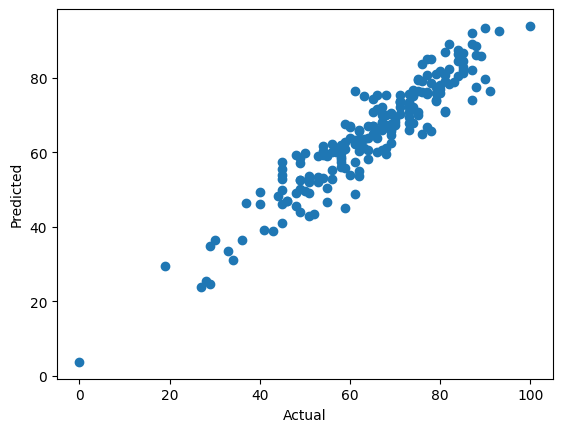

In [89]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [91]:
import seaborn as sns

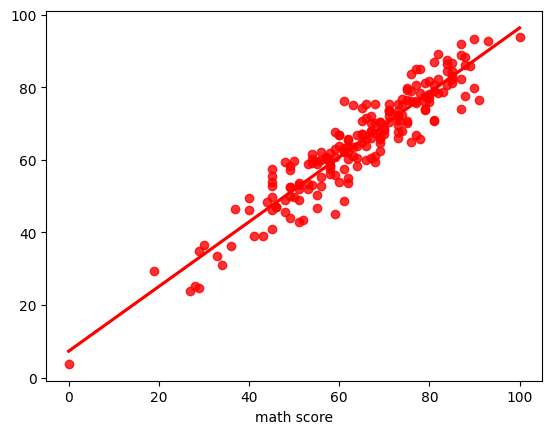

In [92]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');